# World Population Analysis

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

**Columns Description**
* **Rank:** Rank by population
* **CCA3:** 3 digit Country/Territories code
* **Country:** Name of the Country/Territories
* **Capital:** Name of the Capital
* **Continent:** Name of the Continent
* **2022 Population:** Population of the Country/Territories in the year 2022
* **2020 Population:** Population of the Country/Territories in the year 2020
* **2015 Population:** Population of the Country/Territories in the year 2015
* **2010 Population:** Population of the Country/Territories in the year 2010
* **2000 Population:** Population of the Country/Territories in the year 2000
* **1990 Population:** Population of the Country/Territories in the year 1990
* **1980 Population:** Population of the Country/Territories in the year 1980
* **1970 Population:** Population of the Country/Territories in the year 1970
* **Area (km²):** Area size of the Country/Territories in square kilometer
* **Density (per km²):** Population density per square kilometer
* **Growth Rate:** Population growth rate by Country/Territories
* **World Population Percentage:** The population percentage by each Country/Territories

In [2]:
data = pd.read_csv("world_population.csv")

In [3]:
data

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [5]:
data.describe(include='all')

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,234,234,234,234,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
unique,NaN,234,234,234,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,AFG,Afghanistan,Kabul,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,1,1,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,117.500000,NaN,NaN,NaN,NaN,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,NaN,NaN,NaN,NaN,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,NaN,NaN,NaN,NaN,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,NaN,NaN,NaN,NaN,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,NaN,NaN,NaN,NaN,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,NaN,NaN,NaN,NaN,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000


In [6]:
data.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

## Exploratory Data Analysis

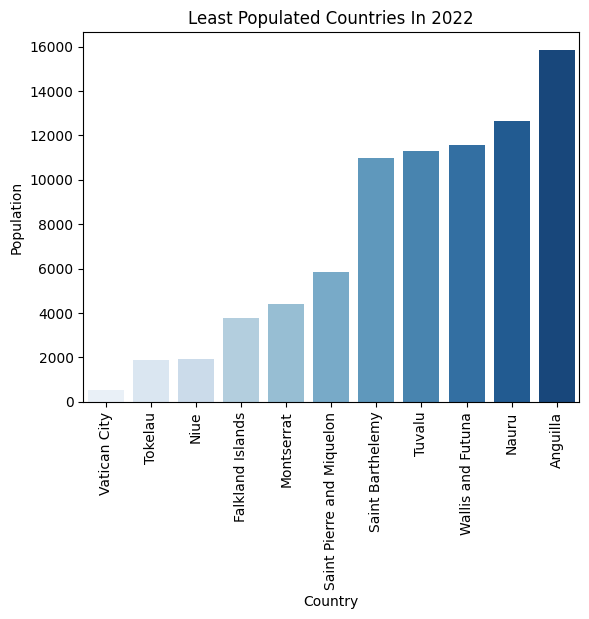

In [7]:
sns.barplot(x=data["Country/Territory"],y=data["2022 Population"],order=data.sort_values("2022 Population",ascending=True)["Country/Territory"][:11], palette="Blues")
plt.title("Least Populated Countries In 2022")
plt.xlabel("Country")
plt.ylabel("Population")
plt.xticks(rotation = 90)
plt.show()

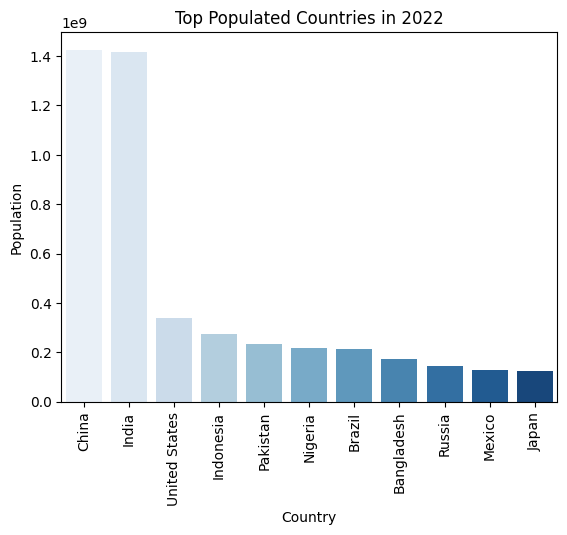

In [8]:
sns.barplot(x=data["Country/Territory"], y=data["2022 Population"], order=data.sort_values("2022 Population", ascending=False)["Country/Territory"][:11], palette="Blues")
plt.title("Top Populated Countries in 2022")
plt.xlabel("Country")
plt.ylabel("Population")
plt.xticks(rotation = 90)
plt.show()

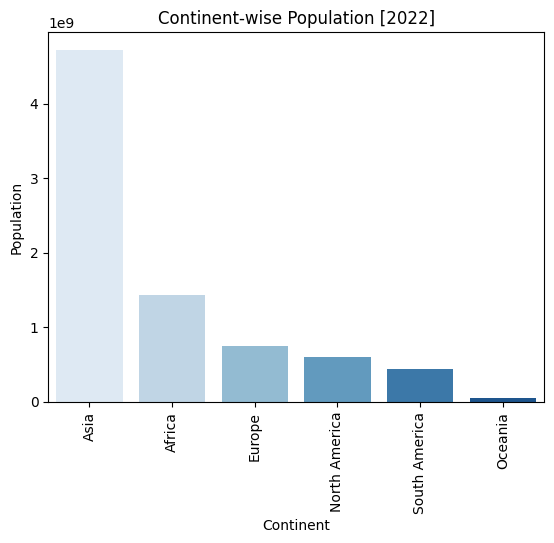

In [9]:
data_pop = data.copy()
data_pop = pd.DataFrame(data_pop.groupby(["Continent"])["1970 Population", "1980 Population", "1990 Population", "2000 Population", "2010 Population", "2015 Population", "2020 Population", "2022 Population"].sum())

sns.barplot(x=data_pop.index, y=data_pop["2022 Population"], order=data_pop.sort_values("2022 Population", ascending=False).index, palette="Blues")
plt.title("Continent-wise Population [2022]")
plt.xlabel("Continent")
plt.ylabel("Population")
plt.xticks(rotation = 90)
plt.show()

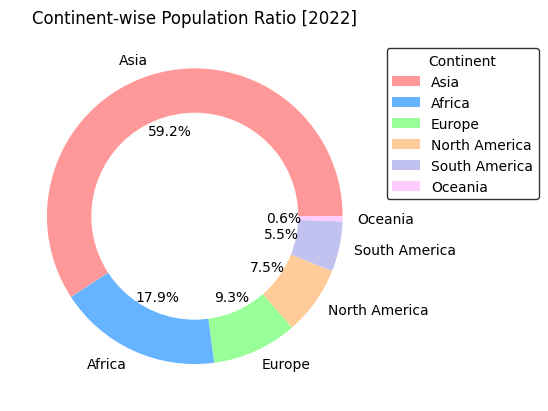

In [10]:
labels = ["Asia","Africa","Europe","North America","South America","Oceania"]
sizes = [data_pop.sort_values("2022 Population",ascending=False)["2022 Population"][0],
         data_pop.sort_values("2022 Population",ascending=False)["2022 Population"][1],
         data_pop.sort_values("2022 Population",ascending=False)["2022 Population"][2],
         data_pop.sort_values("2022 Population",ascending=False)["2022 Population"][3],
         data_pop.sort_values("2022 Population",ascending=False)["2022 Population"][4],
         data_pop.sort_values("2022 Population",ascending=False)["2022 Population"][5]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=["#ff9999","#66b3ff","#99ff99","#ffcc99","#c2c2f0","#ffccff"])
plt.legend(title="Continent", loc="center left", bbox_to_anchor=(1, 0, 0, 1.5), edgecolor="black")
plt.title("Continent-wise Population Ratio [2022]")

# Ajouter un cercle blanc pour créer un trou au milieu
centre_cercle = plt.Circle((0,0), 0.7, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_cercle)

plt.show()


In [11]:
fig = px.choropleth(data_frame=data,
                    locations="Country/Territory",
                    locationmode="country names",
                    hover_name="Country/Territory",
                    hover_data=["2022 Population"],
                    color="2022 Population",
                    scope="world",
                    labels={"2022 Population": "Population"},
                    color_continuous_scale="Blues",
                    )

fig.update_layout(title=dict(text= "Population In The World [2022]"))

fig.show()

In [12]:
fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="2022 Population",
                    scope="asia",
                    hover_name="Country/Territory",
                    hover_data=["2022 Population"],
                    color_continuous_scale="Blues",
                    labels={"2022 Population":"Population"})

fig.update_layout(title=dict(text= "Population In Asia [2022]"))

fig.show()

In [13]:
fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="2022 Population",
                    scope="africa",
                    hover_name="Country/Territory",
                    hover_data=["2022 Population"],
                    color_continuous_scale="Blues",
                    labels={"2022 Population":"Population"})

fig.update_layout(title=dict(text= "Population In Africa [2022]"))

fig.show()

In [14]:
fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="2022 Population",
                    scope="europe",
                    hover_name="Country/Territory",
                    hover_data=["2022 Population"],
                    color_continuous_scale="Blues",
                    labels={"2022 Population":"Population"})

fig.update_layout(title=dict(text= "Population In Europe [2022]"))

fig.show()

In [15]:
fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="2022 Population",
                    scope="north america",
                    hover_name="Country/Territory",
                    hover_data=["2022 Population"],
                    color_continuous_scale="Blues",
                    labels={"2022 Population":"Population"})

fig.update_layout(title=dict(text= "Population In North America [2022]"))

fig.show()

In [16]:
fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="2022 Population",
                    scope="south america",
                    color_continuous_scale="Blues",
                    hover_name="Country/Territory",
                    hover_data=["2022 Population"],
                    labels={"2022 Population":"Population"})

fig.update_layout(title=dict(text= "Population In South America [2022]"))

fig.show()

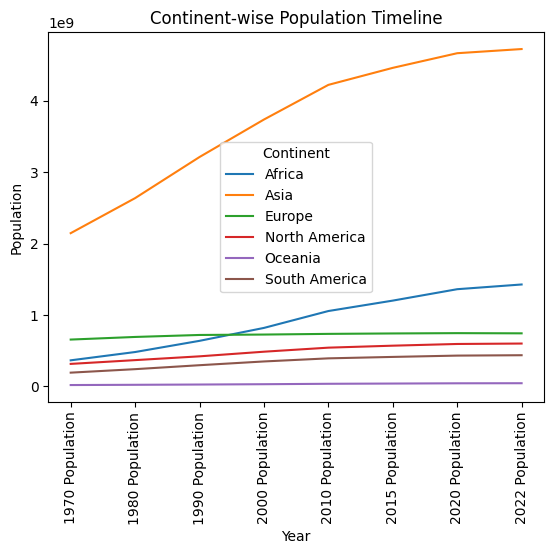

In [17]:
data_pop.T.plot(kind="line")
plt.title("Continent-wise Population Timeline")
plt.xlabel("Year")
plt.ylabel("Population")
plt.xticks(rotation = 90)
plt.legend(title="Continent")

plt.show()

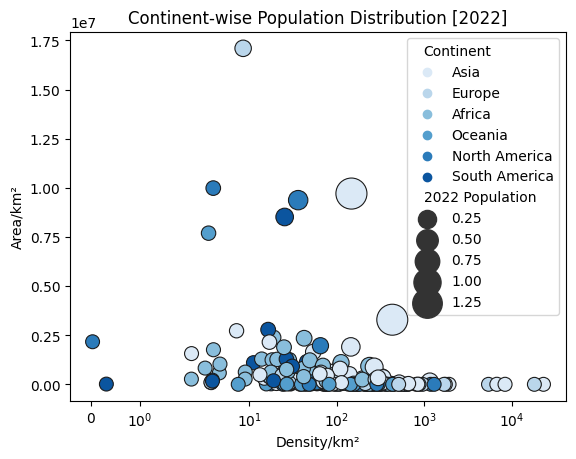

In [18]:
sns.scatterplot(x=data["Density (per km²)"], y=data["Area (km²)"], hue=data["Continent"], size=data["2022 Population"], edgecolor = "#1c1c1c", sizes=(100, 500), palette="Blues")
plt.xscale("symlog")
plt.yscale("linear")
plt.title("Continent-wise Population Distribution [2022]")
plt.xlabel("Density/km²")
plt.ylabel("Area/km²")
plt.show()

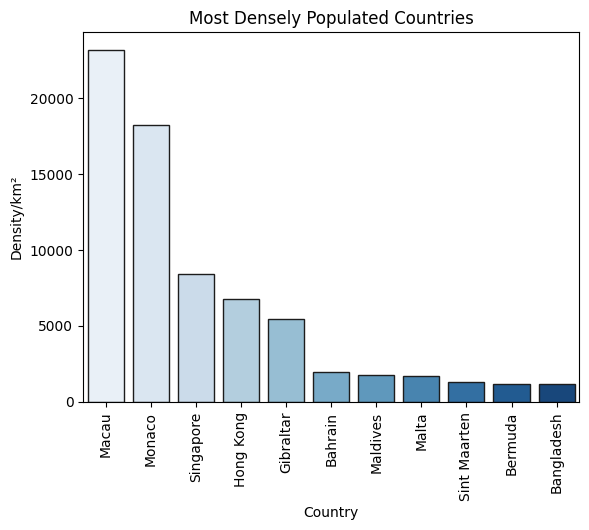

In [19]:
sns.barplot(x=data["Country/Territory"],y=data["Density (per km²)"],order=data.sort_values("Density (per km²)",ascending=False)["Country/Territory"][:11],edgecolor="#1c1c1c",palette="Blues")
plt.yscale("linear")
plt.title("Most Densely Populated Countries")
plt.xlabel("Country")
plt.ylabel("Density/km²")
plt.xticks(rotation = 90)

plt.show()

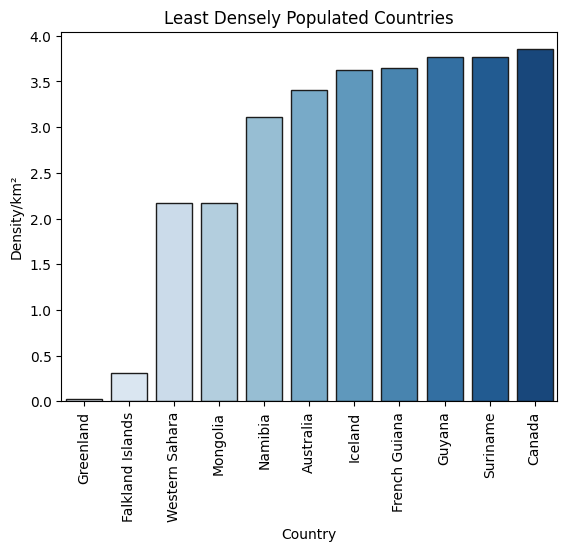

In [20]:
sns.barplot(x=data["Country/Territory"],y=data["Density (per km²)"],order=data.sort_values("Density (per km²)",ascending=True)["Country/Territory"][:11],palette="Blues", edgecolor = "#1c1c1c")
plt.yscale("linear")
plt.title("Least Densely Populated Countries")
plt.xlabel("Country")
plt.ylabel("Density/km²")
plt.xticks(rotation = 90)
plt.show()

In [21]:
data_den = data.copy()
data_den = pd.DataFrame(data_den.groupby(["Continent"])["1970 Population","1980 Population","1990 Population","2000 Population","2010 Population","2015 Population","2020 Population","2022 Population","Area (km²)"].sum())
col = ["1970 Population","1980 Population","1990 Population","2000 Population","2010 Population","2015 Population","2020 Population","2022 Population"]
for i in col:
    data_den[i] = data_den[i]/data_den["Area (km²)"]    
data_den.rename(columns={"1970 Population":"1970 Density","1980 Population":"1980 Density","1990 Population":"1990 Density","2000 Population":"2000 Density","2010 Population":"2010 Density","2015 Population":"2015 Density","2020 Population":"2020 Density","2022 Population":"2022 Density"},inplace=True)
data_den.drop(columns="Area (km²)",inplace=True)

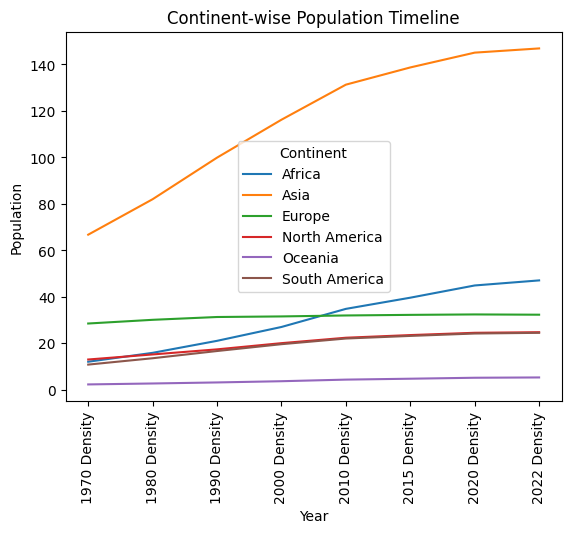

In [22]:
data_den.T.plot(kind="line")
plt.title("Continent-wise Population Timeline")
plt.xlabel("Year")
plt.ylabel("Population")
plt.xticks(rotation = 90)
plt.legend(title="Continent")

plt.show()

## Population Growth Rate

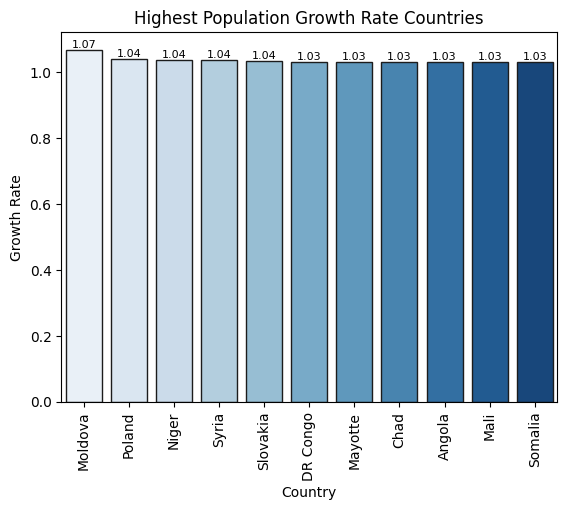

In [23]:
sns.barplot(x=data["Country/Territory"], y=data["Growth Rate"], order=data.sort_values("Growth Rate", ascending=False)["Country/Territory"][:11], palette="Blues", edgecolor = "#1c1c1c")
plt.yscale("linear")
plt.title("Highest Population Growth Rate Countries")
plt.xlabel("Country")
plt.ylabel("Growth Rate")
plt.xticks(rotation=90)

for i, v in enumerate(data.sort_values("Growth Rate", ascending=False)["Growth Rate"][:11]):
    plt.text(i, v, str(np.round(v, 2)), ha="center", va="bottom", fontsize=8, color="black")


plt.show()

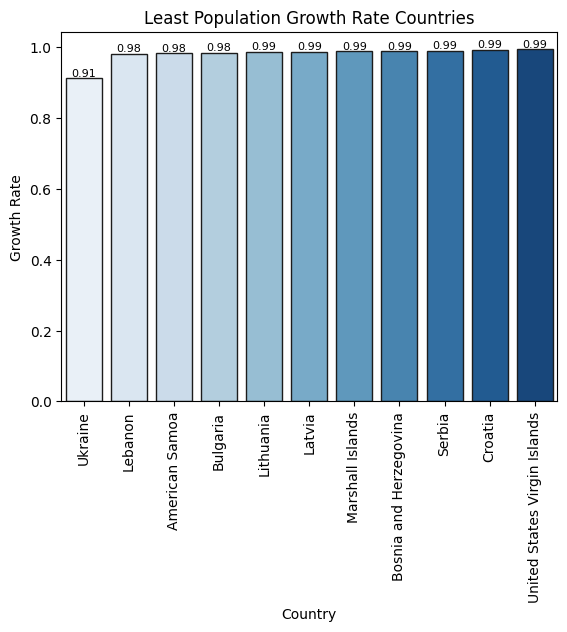

In [24]:
sns.barplot(x=data["Country/Territory"], y=data["Growth Rate"], order=data.sort_values("Growth Rate", ascending=True)["Country/Territory"][:11], palette="Blues", edgecolor = "#1c1c1c")
plt.yscale("linear")
plt.title("Least Population Growth Rate Countries")
plt.xlabel("Country")
plt.ylabel("Growth Rate")
plt.xticks(rotation=90)

for i, v in enumerate(data.sort_values("Growth Rate", ascending=True)["Growth Rate"][:11]):
    plt.text(i, v, str(np.round(v, 2)), ha="center", va="bottom", fontsize=8, color="black")

plt.show()


In [25]:
fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="Growth Rate",
                    scope="asia",
                    hover_name="Country/Territory",
                    hover_data=["Growth Rate"],
                    color_continuous_scale="Blues",
                    labels={"Growth Rate":"Growth Rate"})

fig.update_layout(title=dict(text= "Population Growth Rate In Asia"))

fig.show()

In [26]:
fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="Growth Rate",
                    scope="africa",
                    hover_name="Country/Territory",
                    hover_data=["Growth Rate"],
                    color_continuous_scale="Blues",
                    labels={"Growth Rate":"Growth Rate"})

fig.update_layout(title=dict(text= "Population Growth Rate In Africa"))

fig.show()

In [27]:
fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="Growth Rate",
                    scope="europe",
                    hover_name="Country/Territory",
                    hover_data=["Growth Rate"],
                    color_continuous_scale="Blues",
                    labels={"Growth Rate":"Growth Rate"})

fig.update_layout(title=dict(text= "Population Growth Rate In Europe"))

fig.show()

In [28]:
fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="Growth Rate",
                    scope="north america",
                    hover_name="Country/Territory",
                    hover_data=["Growth Rate"],
                    color_continuous_scale="Blues",
                    labels={"Growth Rate":"Growth Rate"})

fig.update_layout(title=dict(text= "Population Growth Rate In North America"))

fig.show()

In [29]:
fig = px.choropleth(data_frame = data,
                    locations="Country/Territory",locationmode="country names", color="Growth Rate",
                    scope="south america",
                    hover_name="Country/Territory",
                    hover_data=["Growth Rate"],
                    color_continuous_scale="Blues",
                    labels={"Growth Rate":"Growth Rate"})

fig.update_layout(title=dict(text= "Population Growth Rate In South America"))

fig.show()

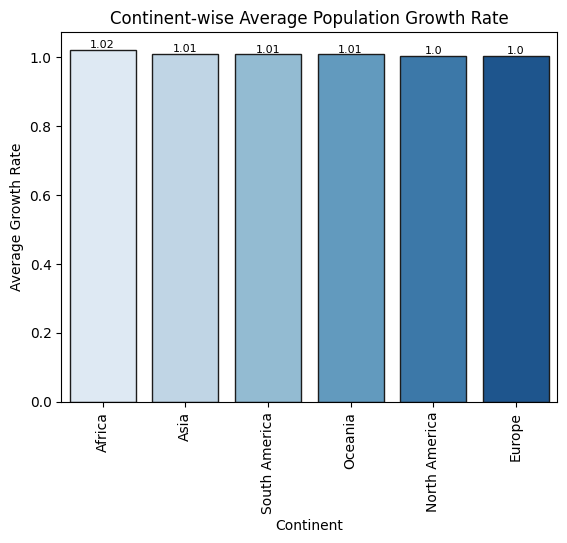

In [30]:
data_gr = data.groupby('Continent')['Growth Rate'].mean().sort_values(ascending=False)

sns.barplot(x=data_gr.index, y=data_gr, order=data_gr.index, palette="Blues", edgecolor="#1c1c1c")
plt.title('Continent-wise Average Population Growth Rate')
plt.xlabel('Continent')
plt.ylabel('Average Growth Rate')
plt.xticks(rotation=90)

for i, v in enumerate(data.groupby('Continent')['Growth Rate'].mean().sort_values(ascending=False)):
    plt.text(i, v, str(np.round(v, 2)), ha="center", va="bottom", fontsize=8, color="black")

plt.show()

## Correlation Map

In [31]:
data.corr()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,1.000000,-0.358361,-0.355854,-0.351222,-0.347461,-0.341057,-0.336152,-0.335246,-0.335379,-0.383774,0.129436,-0.224561,-0.358464
2022 Population,-0.358361,1.000000,0.999946,0.999490,0.998629,0.994605,0.987228,0.980285,0.973162,0.453411,-0.027618,-0.020863,0.999999
2020 Population,-0.355854,0.999946,1.000000,0.999763,0.999105,0.995583,0.988724,0.982121,0.975254,0.454993,-0.027358,-0.025116,0.999944
2015 Population,-0.351222,0.999490,0.999763,1.000000,0.999783,0.997340,0.991594,0.985724,0.979414,0.458240,-0.026857,-0.032154,0.999487
2010 Population,-0.347461,0.998629,0.999105,0.999783,1.000000,0.998593,0.993929,0.988786,0.983042,0.461936,-0.026505,-0.037983,0.998626
2000 Population,-0.341057,0.994605,0.995583,0.997340,0.998593,1.000000,0.998336,0.995160,0.990956,0.473933,-0.026139,-0.050515,0.994598
1990 Population,-0.336152,0.987228,0.988724,0.991594,0.993929,0.998336,1.000000,0.999042,0.996602,0.486764,-0.026224,-0.062397,0.987218
1980 Population,-0.335246,0.980285,0.982121,0.985724,0.988786,0.995160,0.999042,1.000000,0.999194,0.498166,-0.026587,-0.072349,0.980273
1970 Population,-0.335379,0.973162,0.975254,0.979414,0.983042,0.990956,0.996602,0.999194,1.000000,0.509940,-0.026881,-0.081313,0.973150
Area (km²),-0.383774,0.453411,0.454993,0.458240,0.461936,0.473933,0.486764,0.498166,0.509940,1.000000,-0.063128,-0.013970,0.453284


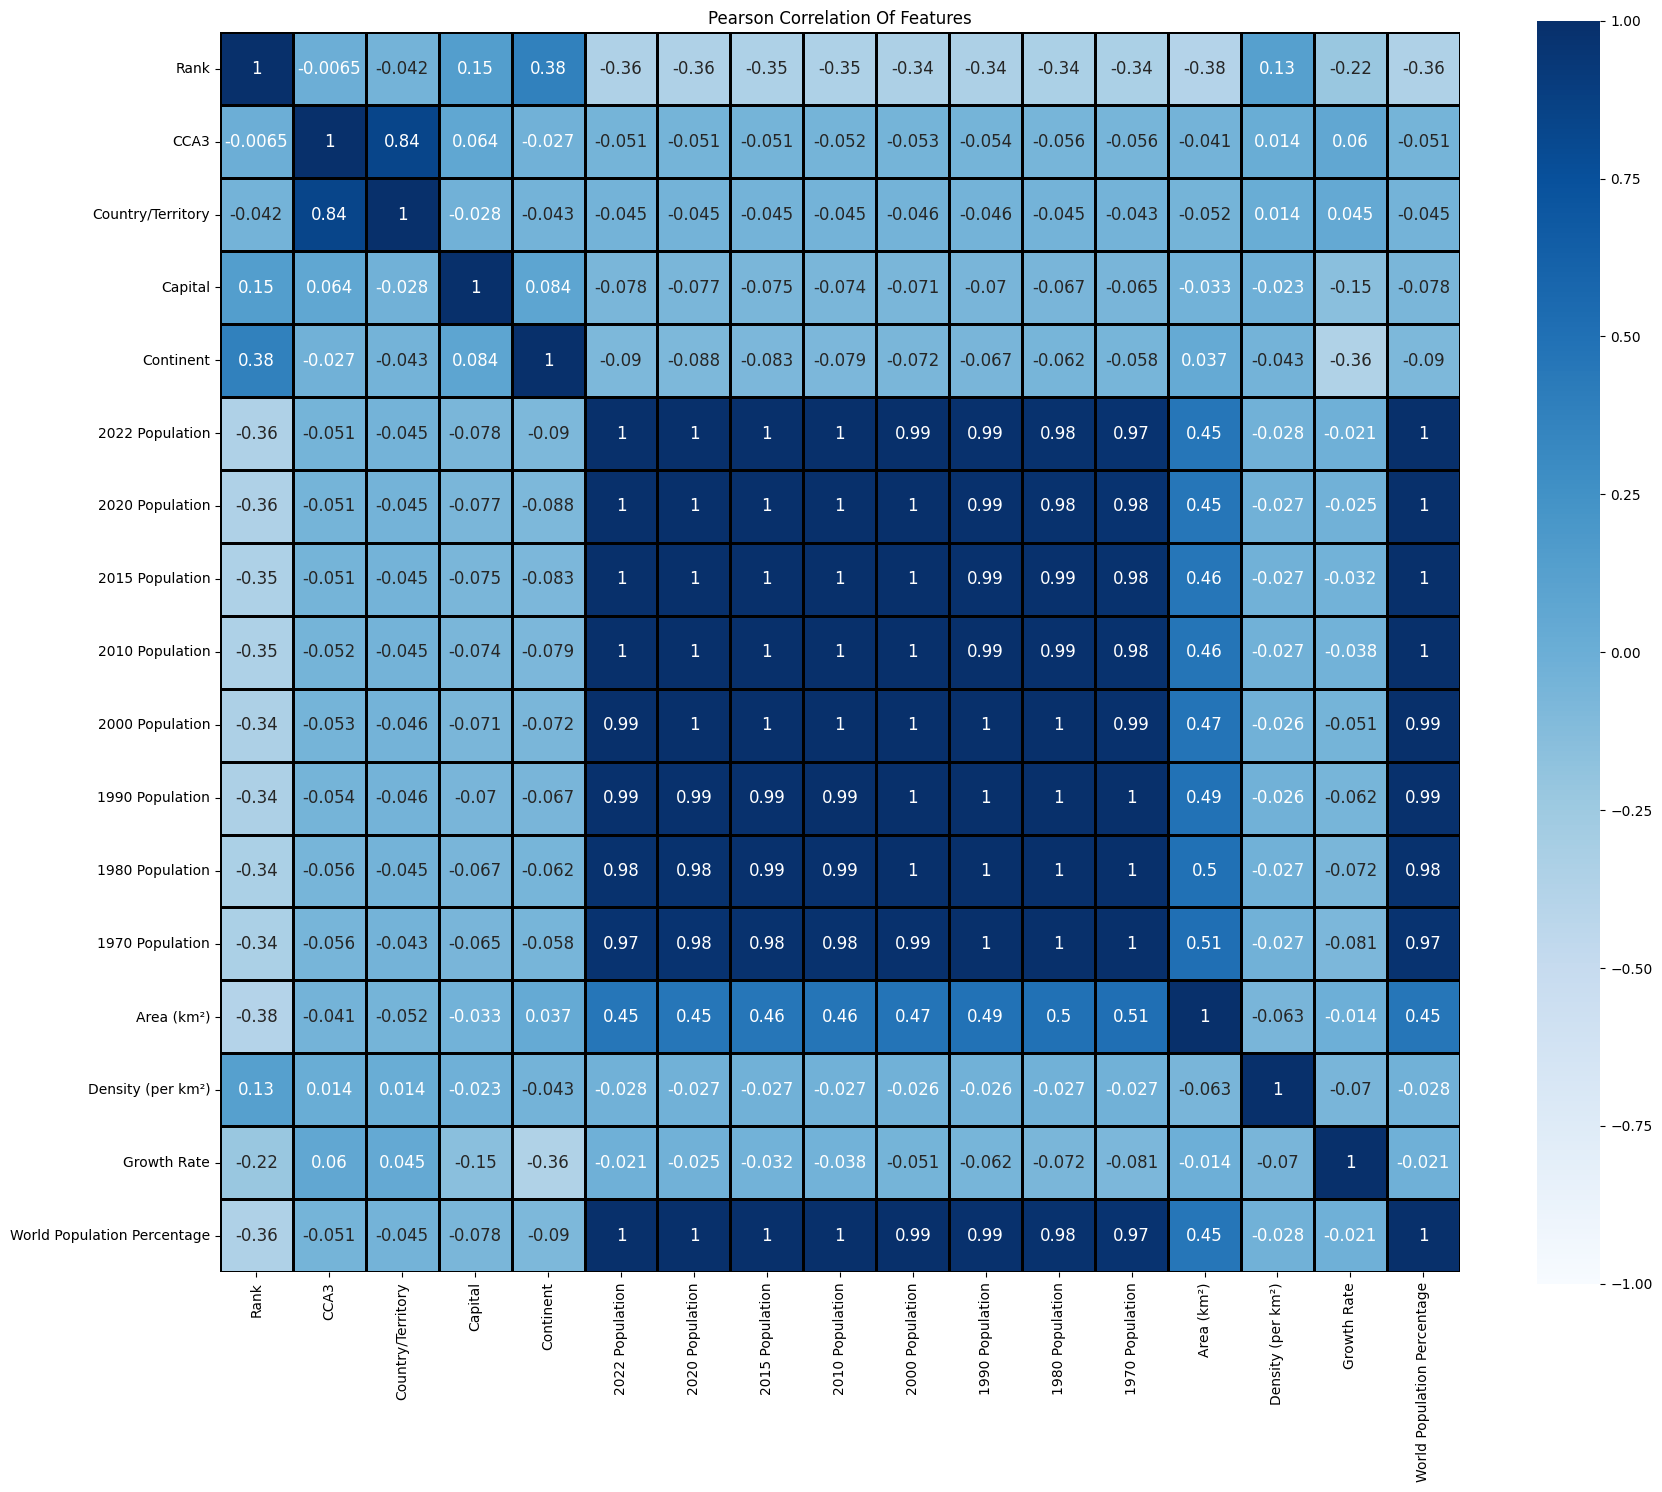

In [32]:
catcol = ["CCA3","Country/Territory","Capital","Continent"]
le = LabelEncoder()
for col in catcol:
        data[col] = le.fit_transform(data[col])

plt.subplots(figsize =(20, 20))

sns.heatmap(data.corr(), cmap = "Blues", square=True, cbar_kws=dict(shrink =.82), 
            annot=True, vmin=-1, vmax=1, linewidths=2,linecolor='black',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features")
plt.xticks(rotation=90)
plt.show()

* High correlation between population and world population percentage: This means that countries with higher population tend to have a larger share of the world population. This is not surprising since larger countries naturally have a larger population, and therefore a larger percentage of the world population.

* Medium correlation between area and population: This indicates that there is a relationship between a country's size and its population. Larger countries tend to have a larger population, while smaller countries tend to have a smaller population.

* Medium correlation between area and world population percentage: This suggests that the size of a country is a factor in determining its share of the world population. Larger countries tend to have a larger share of the world population, while smaller countries tend to have a smaller share.

* Medium inverse correlation between growth rate and continent: This means that there is a relationship between a country's population growth rate and the continent it is located in. Some continents, such as Africa, have higher population growth rates compared to others, while others, such as Europe, have lower population growth rates.

* Medium inverse correlation between rank and world population percentage: This indicates that countries with a higher rank (i.e., larger population) tend to have a smaller share of the world population. This is because there are fewer countries with large populations, so each individual country with a large population has a smaller share of the world population.

* Medium inverse correlation between rank and area: This means that countries with a higher rank tend to have a smaller land area. This is because there are fewer countries with large land areas, so each individual country with a large land area has a higher rank.

* Medium inverse correlation between rank and population: This indicates that countries with a higher rank tend to have a larger population. This is because countries with larger populations will have a higher rank compared to countries with smaller populations.

## Conclusion

According to the US Census Bureau, the world population estimate as of June 2019 was 7,577,130,400, which is higher than the estimated world population of 7.2 billion in 2015. Additionally, our own estimate based on UN data indicates that the world population has surpassed 7.7 billion.

China is currently the most populous country with a population exceeding 1.4 billion, followed by India with a population of over 1.355 billion. India is expected to surpass China and become the most populous country by 2030 due to continued population growth, while China is projected to experience a decline in population. The next 11 most populous countries each have populations exceeding 100 million, with the exception of Japan and Russia, which are expected to see a decline in population by 2030 before falling further by 2050.

Aside from these countries, there are many others with populations ranging from millions to just thousands. Vatican City has the smallest population in the world with only 801 residents.

Based on the correlation analysis, we can see that population has a high positive correlation with world population percentage, which is expected. It also has a medium positive correlation with area and a medium inverse correlation with rank. This suggests that larger countries with higher population tend to have a higher rank.

There is a medium correlation between area and world population percentage, which suggests that larger countries tend to have a higher world population percentage.

Finally, there is a medium inverse correlation between growth rate and continent, which suggests that certain continents have a lower growth rate compared to others. There is also a medium inverse correlation between rank and world population percentage, which suggests that higher ranked countries tend to have a lower world population percentage.